In [293]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-notebook')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [294]:
airbnb = pd.read_csv('AB_NYC_2019.csv')
airbnb.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

## Checking the shape of the dataframe

In [295]:
airbnb.shape

(48895, 16)

### Checking the datatypes of the dataframe

In [296]:
airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [297]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

### Understanding, Wrangling and Cleaning data

In [298]:
# Checking the number of missing values in the dataset for each columns
airbnb.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

From the above information we can see that the data that are missing in columns that are insignificant to our data analysis. Columns such as 'name','host_name' and 'last_review' doesn't signify the price of the listings. So, we will be dropping those columns. 'reviews_per_month' column can be attributed as a calculated field from 'number_of_reviews'. Since, its a calculated field, we can replace the missing values with 0.

In [299]:
airbnb.drop(axis = 1,columns = ['name','host_name','last_review'],inplace = True)

In [300]:
# Assigning zeroes to missing values in 'reviews_per_month'
airbnb['reviews_per_month'].fillna(0,inplace = True)
airbnb.isna().sum()

id                                0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [301]:
# Checking the shape of dataframe
airbnb.shape

(48895, 13)

Examining the categorical columns in the dataset

In [302]:
# Checking the unique values in the 'neighbourhood_group' column
airbnb['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [303]:
# Checking the unique values in the 'neighbourhood' column
airbnb['neighbourhood'].unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [304]:
# Checking the unique values of 'room_type' column
airbnb['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

### Exploratory Data Analysis
*Exploring the data by analyzing the statistics and visualising the values of features and correlations between different features.*

We will be exploring each and every columns of the dataset. We will be working from left to right, and we will be working on the columns individually.

In [305]:
# Working on 'id' column
# Let's check if there are any duplicates in the column
airbnb[airbnb['id'].duplicated()]

Empty DataFrame
Columns: [id, host_id, neighbourhood_group, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, reviews_per_month, calculated_host_listings_count, availability_365]
Index: []

We can see that there are no duplicated rows in the dataset.

In [306]:
#Working on 'host_id' column
host = airbnb['host_id'].value_counts()[:10]
host

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

[Text(0, 0, '219517861'),
 Text(0, 0, '107434423'),
 Text(0, 0, '30283594'),
 Text(0, 0, '137358866'),
 Text(0, 0, '12243051'),
 Text(0, 0, '16098958'),
 Text(0, 0, '61391963'),
 Text(0, 0, '22541573'),
 Text(0, 0, '200380610'),
 Text(0, 0, '7503643')]

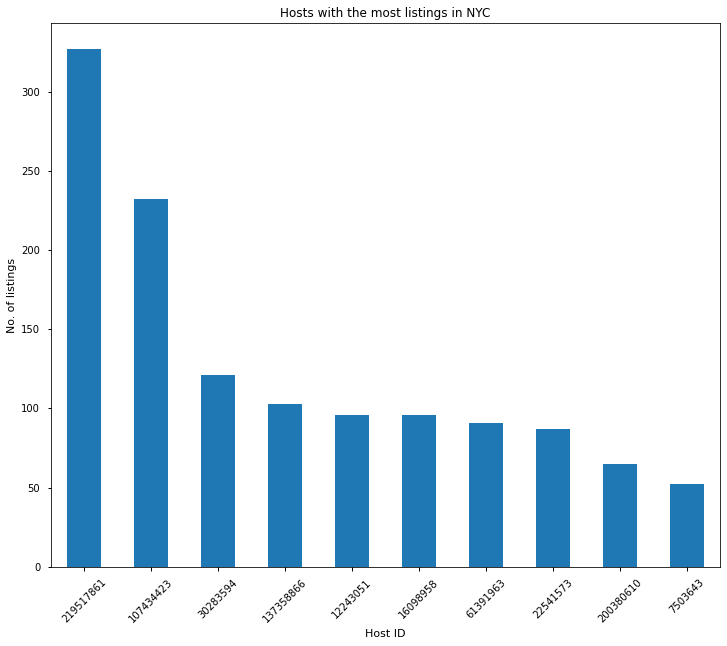

In [307]:
#flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
#sns.set_palette(sns.color_palette(flatui))
_ = plt.figure(figsize=(12,10))
_ = host.plot(kind='bar')
_.set_title('Hosts with the most listings in NYC')
_.set_ylabel('No. of listings')
_.set_xlabel('Host ID')
_.set_xticklabels(_.get_xticklabels(), rotation = 45)

From the above bar plot, we can see that the host which has most listings has over 300+ listings.

In [308]:
# Checking 'neighbourhood_group' column
neighb_group = airbnb['neighbourhood_group'].value_counts()
neighb_group

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

[Text(0, 0, 'Manhattan'),
 Text(0, 0, 'Brooklyn'),
 Text(0, 0, 'Queens'),
 Text(0, 0, 'Bronx'),
 Text(0, 0, 'Staten Island')]

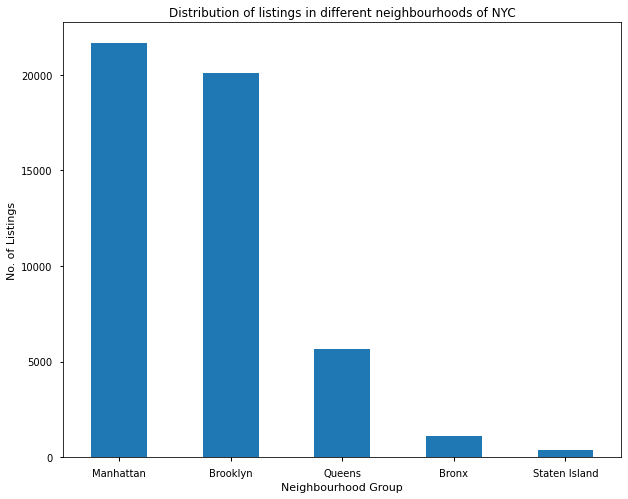

In [309]:
_ = plt.figure(figsize = (10,8))
_ = neighb_group.plot(kind = 'bar')
_.set_title('Distribution of listings in different neighbourhoods of NYC')
_.set_xlabel('Neighbourhood Group')
_.set_ylabel('No. of Listings')
_.set_xticklabels(_.get_xticklabels(), rotation = 0)

From the above bar plot, we can see that Manhattan has the most number of listings. Its interesting to note that two of the neighbourhood groups - Manhattan and Brooklyn has over 20,000 each listings while other neighbourhood groups has no. of listings that are less than 6,000. This attributes to the fact that most of the iconic landmarks and most happening neighbourhoods are Manhattan and Brooklyn.

In [310]:
# Checking the average prices of listings in each neigbourhood groups 
avg_price_grp = airbnb.groupby('neighbourhood_group').agg(np.mean)
avg_price_grp['price']

neighbourhood_group
Bronx             87.496792
Brooklyn         124.383207
Manhattan        196.875814
Queens            99.517649
Staten Island    114.812332
Name: price, dtype: float64

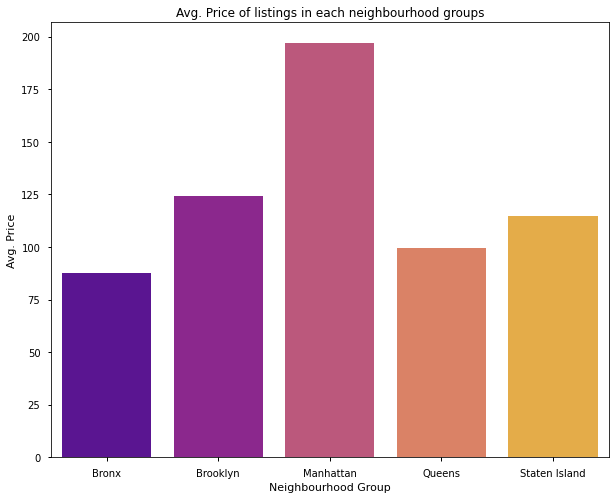

In [311]:
_ = plt.figure(figsize = (10,8))
_ = sns.barplot(x= avg_price_grp.index,y=avg_price_grp['price'], palette = 'plasma')
_.set_title('Avg. Price of listings in each neighbourhood groups')
_.set_xlabel('Neighbourhood Group')
_.set_ylabel('Avg. Price');

In [312]:
#Describing the 'neighbourhood_group" column with prices
avg_price_grp2 = airbnb.groupby('neighbourhood_group')['price']

avg_price_grp2.describe()

count        mean         std   min   25%    50%  \
neighbourhood_group                                                       
Bronx                 1091.0   87.496792  106.709349   0.0  45.0   65.0   
Brooklyn             20104.0  124.383207  186.873538   0.0  60.0   90.0   
Manhattan            21661.0  196.875814  291.383183   0.0  95.0  150.0   
Queens                5666.0   99.517649  167.102155  10.0  50.0   75.0   
Staten Island          373.0  114.812332  277.620403  13.0  50.0   75.0   

                       75%      max  
neighbourhood_group                  
Bronx                 99.0   2500.0  
Brooklyn             150.0  10000.0  
Manhattan            220.0  10000.0  
Queens               110.0  10000.0  
Staten Island        110.0   5000.0

In [313]:
# Plotting the distribution plot of prices of listing in each neighbourhood groups
manh = airbnb[airbnb['neighbourhood_group']=='Manhattan']
brook = airbnb[airbnb['neighbourhood_group']=='Brooklyn']
queens = airbnb[airbnb['neighbourhood_group']=='Queens']
statisl = airbnb[airbnb['neighbourhood_group']=='Staten Island']
bronx = airbnb[airbnb['neighbourhood_group']=='Bronx']
print (manh['room_type'].value_counts())
print (brook['room_type'].value_counts())
print (queens['room_type'].value_counts())
print (statisl['room_type'].value_counts())
print (bronx['room_type'].value_counts())

Entire home/apt    13199
Private room        7982
Shared room          480
Name: room_type, dtype: int64
Private room       10132
Entire home/apt     9559
Shared room          413
Name: room_type, dtype: int64
Private room       3372
Entire home/apt    2096
Shared room         198
Name: room_type, dtype: int64
Private room       188
Entire home/apt    176
Shared room          9
Name: room_type, dtype: int64
Private room       652
Entire home/apt    379
Shared room         60
Name: room_type, dtype: int64


<Figure size 720x576 with 0 Axes>

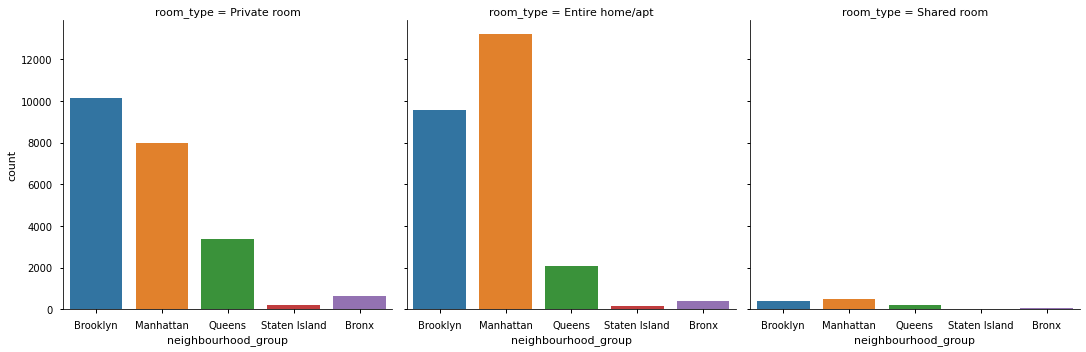

In [314]:
plt.figure(figsize=(10,8));
sns.catplot(x='neighbourhood_group',col = 'room_type',data=airbnb, kind='count'); 

From the above bar plots, we can see that the number of private room listings are greatest in Brooklyn. For room type entire home/apartment listing and shared room, Manhattan has the most number of listings. While the least number of listings are among all the three room types are in Staten Island.

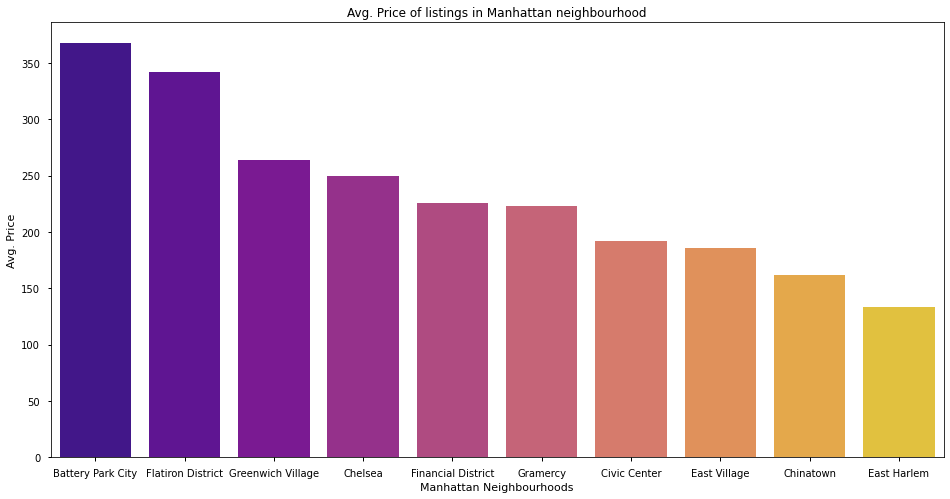

In [315]:
#Neighbourhood columns
#Manhattan
manh_neigh = manh.groupby('neighbourhood').agg(np.mean)[:10].sort_values(by = 'price',ascending = False)
_ = plt.figure(figsize = (16,8))
_ = sns.barplot(x= manh_neigh.index,y=manh_neigh['price'], palette = 'plasma')
_.set_title('Avg. Price of listings in Manhattan neighbourhood')
_.set_xlabel('Manhattan Neighbourhoods')
_.set_ylabel('Avg. Price');

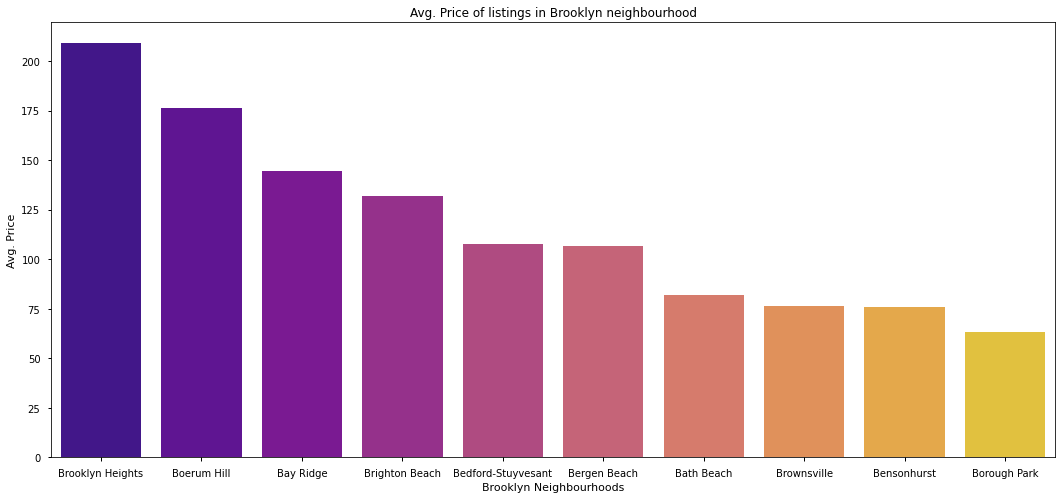

In [316]:
brook_neigh = brook.groupby('neighbourhood').agg(np.mean)[:10].sort_values(by = 'price',ascending = False)
_ = plt.figure(figsize = (18,8))
_ = sns.barplot(x= brook_neigh.index,y=brook_neigh['price'], palette = 'plasma')
_.set_title('Avg. Price of listings in Brooklyn neighbourhood')
_.set_xlabel('Brooklyn Neighbourhoods')
_.set_ylabel('Avg. Price');

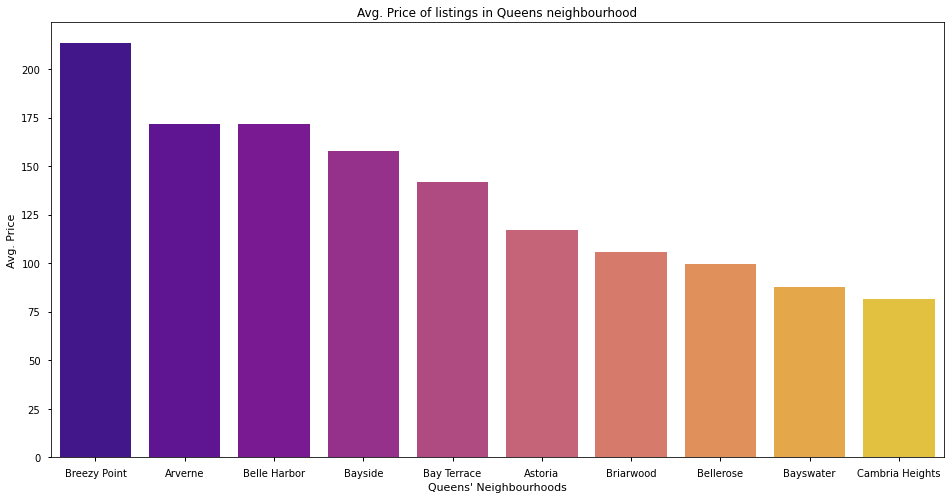

In [317]:
queens_neigh = queens.groupby('neighbourhood').agg(np.mean)[:10].sort_values(by = 'price',ascending = False)
_ = plt.figure(figsize = (16,8))
_ = sns.barplot(x= queens_neigh.index,y=queens_neigh['price'], palette = 'plasma')
_.set_title('Avg. Price of listings in Queens neighbourhood')
_.set_xlabel('Queens\' Neighbourhoods')
_.set_ylabel('Avg. Price');

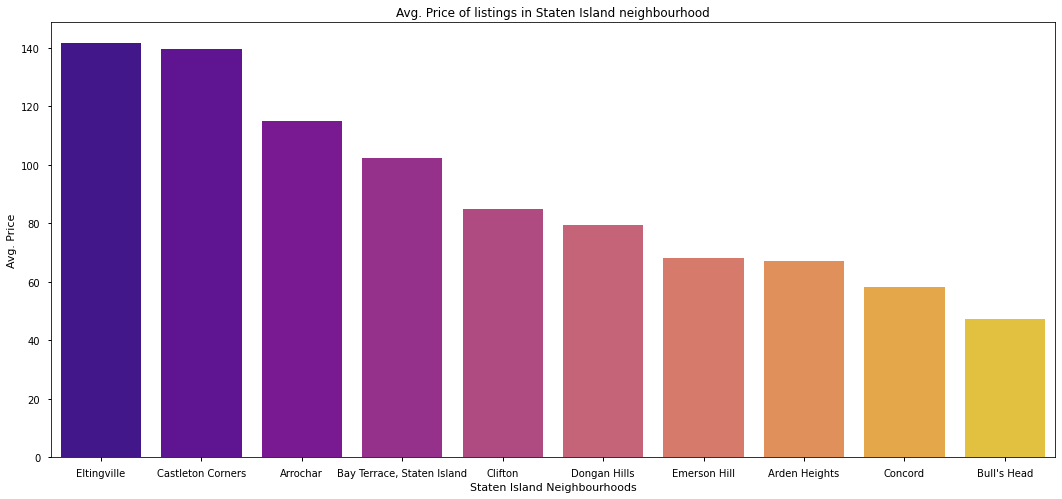

In [318]:
statisl_neigh = statisl.groupby('neighbourhood').agg(np.mean)[:10].sort_values(by = 'price',ascending = False)
_ = plt.figure(figsize = (18,8))
_ = sns.barplot(x= statisl_neigh.index,y=statisl_neigh['price'], palette = 'plasma')
_.set_title('Avg. Price of listings in Staten Island neighbourhood')
_.set_xlabel('Staten Island Neighbourhoods')
_.set_ylabel('Avg. Price');

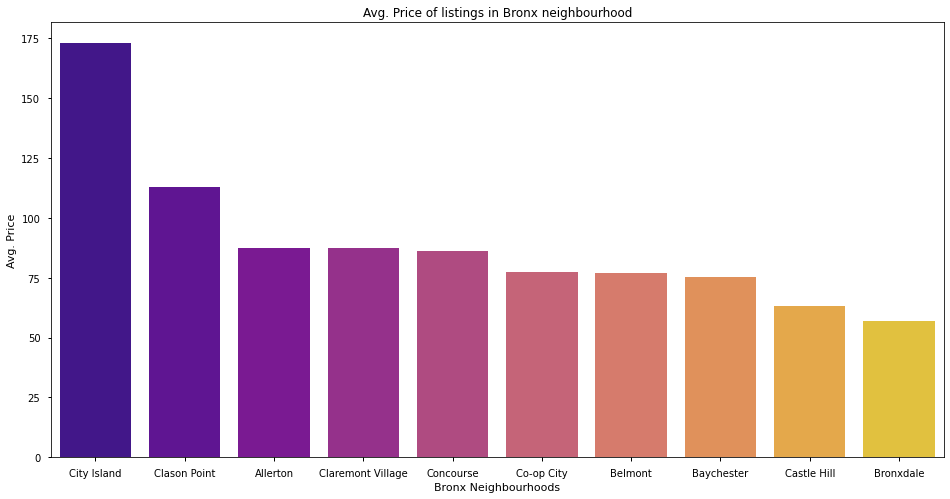

In [319]:
bronx_neigh = bronx.groupby('neighbourhood').agg(np.mean)[:10].sort_values(by = 'price',ascending = False)
_ = plt.figure(figsize = (16,8))
_ = sns.barplot(x= bronx_neigh.index,y=bronx_neigh['price'], palette = 'plasma')
_.set_title('Avg. Price of listings in Bronx neighbourhood')
_.set_xlabel('Bronx Neighbourhoods')
_.set_ylabel('Avg. Price');

In [320]:
## Removing host_id, id, latitude and longitude columns
rem_column = ['id','host_id','latitude','longitude']
airbnb_df = airbnb.copy().drop(rem_column,axis=1)

In [321]:
# Describing the dataframe
airbnb_df.describe()

price  minimum_nights  number_of_reviews  reviews_per_month  \
count  48895.000000    48895.000000       48895.000000       48895.000000   
mean     152.720687        7.029962          23.274466           1.090910   
std      240.154170       20.510550          44.550582           1.597283   
min        0.000000        1.000000           0.000000           0.000000   
25%       69.000000        1.000000           1.000000           0.040000   
50%      106.000000        3.000000           5.000000           0.370000   
75%      175.000000        5.000000          24.000000           1.580000   
max    10000.000000     1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

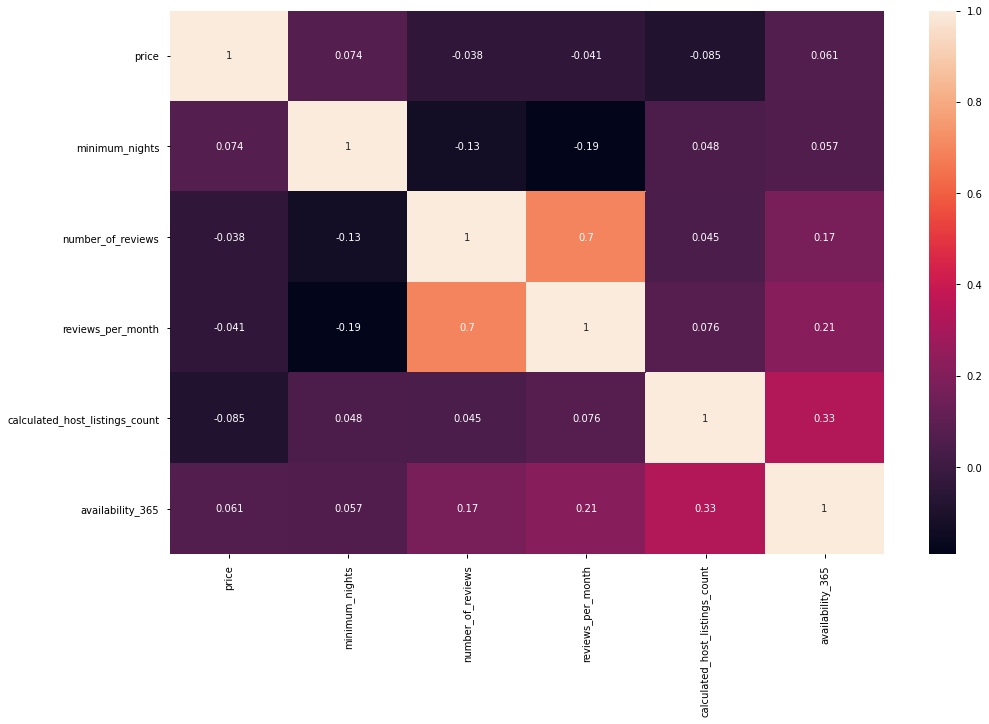

In [322]:
airbnb_corr = airbnb_df.corr(method = 'kendall')
plt.figure(figsize = (16,10))
sns.heatmap(airbnb_corr,annot = True);

In [323]:
config = {
  "version": "v1",
  "config": {
    "visState": {
      "filters": [],
      "layers": [
        {
          "id": "svb5029",
          "type": "point",
          "config": {
            "dataId": "data_1",
            "label": "Point",
            "color": [
              18,
              147,
              154
            ],
            "columns": {
              "lat": "latitude",
              "lng": "longitude",
              "altitude": None
            },
            "isVisible": True,
            "visConfig": {
              "radius": 4.9,
              "fixedRadius": False,
              "opacity": 0.8,
              "outline": False,
              "thickness": 2,
              "strokeColor": None,
              "colorRange": {
                "name": "ColorBrewer Set1-5",
                "type": "qualitative",
                "category": "ColorBrewer",
                "colors": [
                  "#e41a1c",
                  "#377eb8",
                  "#4daf4a",
                  "#984ea3",
                  "#ff7f00"
                ]
              },
              "strokeColorRange": {
                "name": "Global Warming",
                "type": "sequential",
                "category": "Uber",
                "colors": [
                  "#5A1846",
                  "#900C3F",
                  "#C70039",
                  "#E3611C",
                  "#F1920E",
                  "#FFC300"
                ]
              },
              "radiusRange": [
                0,
                50
              ],
              "filled": True
            },
            "hidden": False,
            "textLabel": [
              {
                "field": None,
                "color": [
                  255,
                  255,
                  255
                ],
                "size": 18,
                "offset": [
                  0,
                  0
                ],
                "anchor": "start",
                "alignment": "center"
              }
            ]
          },
          "visualChannels": {
            "colorField": {
              "name": "neighbourhood_group",
              "type": "string"
            },
            "colorScale": "ordinal",
            "strokeColorField": None,
            "strokeColorScale": "quantile",
            "sizeField": None,
            "sizeScale": "linear"
          }
        }
      ],
      "interactionConfig": {
        "tooltip": {
          "fieldsToShow": {
            "data_1": [
              "id",
              "host_id",
              "neighbourhood_group",
              "neighbourhood",
              "room_type"
            ]
          },
          "enabled": True
        },
        "brush": {
          "size": 0.5,
          "enabled": False
        },
        "geocoder": {
          "enabled": False
        },
        "coordinate": {
          "enabled": False
        }
      },
      "layerBlending": "normal",
      "splitMaps": [],
      "animationConfig": {
        "currentTime": None,
        "speed": 1
      }
    },
    "mapState": {
      "bearing": 0,
      "dragRotate": False,
      "latitude": 40.72810948936782,
      "longitude": -73.63147791820853,
      "pitch": 0,
      "zoom": 8.927022615612042,
      "isSplit": False
    },
    "mapStyle": {
      "styleType": "dark",
      "topLayerGroups": {
        "label": True,
        "water": True
      },
      "visibleLayerGroups": {
        "label": True,
        "road": True,
        "border": False,
        "building": True,
        "water": True,
        "land": True,
        "3d building": False
      },
      "threeDBuildingColor": [
        9.665468314072013,
        17.18305478057247,
        31.1442867897876
      ],
      "mapStyles": {}
    }
  }
}

In [324]:
from keplergl import KeplerGl
map1 = KeplerGl(height = 400,data = {'data_1':airbnb},config = config)

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


In [325]:
map1

KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': 'svb5029', 'type': …

In [326]:
airbnb['availability_365'].describe()

count    48895.000000
mean       112.781327
std        131.622289
min          0.000000
25%          0.000000
50%         45.000000
75%        227.000000
max        365.000000
Name: availability_365, dtype: float64

In [327]:
# We will be converting the 'availability_365' column in terms of year
airbnb['availability_365'] = airbnb['availability_365']/365
airbnb['availability_365'].describe()

count    48895.000000
mean         0.308990
std          0.360609
min          0.000000
25%          0.000000
50%          0.123288
75%          0.621918
max          1.000000
Name: availability_365, dtype: float64

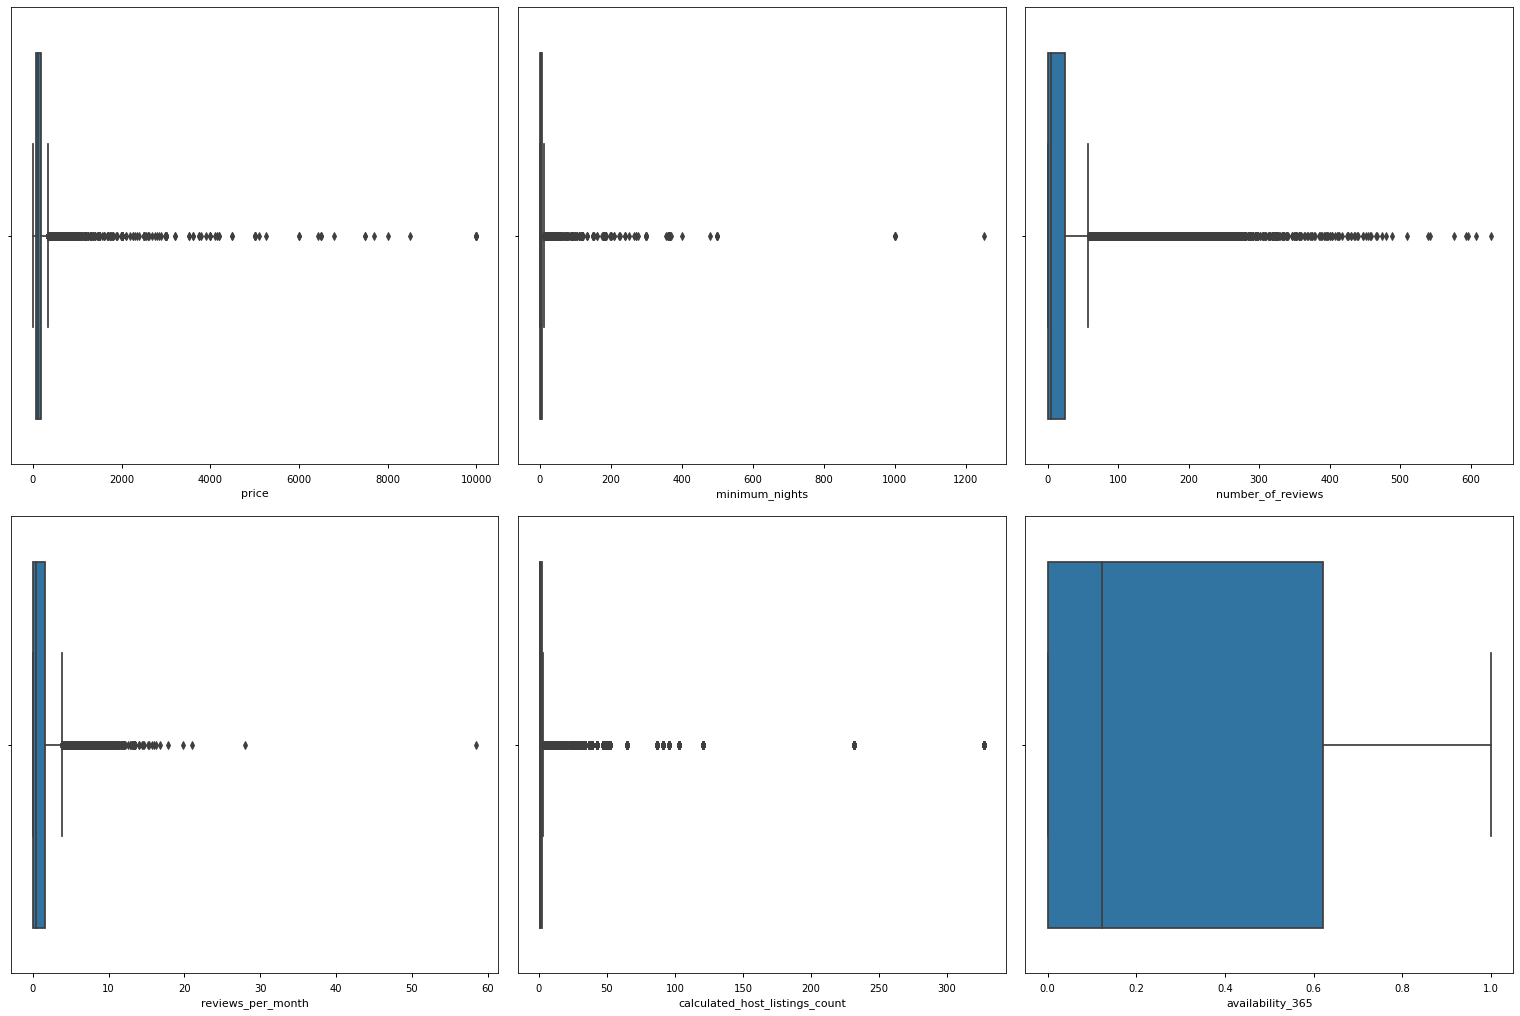

In [328]:
# checking outliers
num_categories = ['price','minimum_nights','number_of_reviews','reviews_per_month',
                  'calculated_host_listings_count','availability_365']
num_plots = len(num_categories)
total_cols = 3
total_rows = len(num_categories)//total_cols 
fig, axs = plt.subplots(nrows= total_rows, ncols = total_cols, 
                        figsize = (7*total_cols, 7*total_rows),constrained_layout = True)
for i, col in enumerate(num_categories):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.boxplot(x=col,data = airbnb,ax = axs[row][pos]);

# Feature Selection

In [329]:
# We will be using Lasso regularisation to rank the feature importance
from sklearn.linear_model import LassoCV, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
# Dropping 'neighbourhood' column
airbnb_df.drop(['neighbourhood'],axis=1,inplace=True)
airbnb_df = pd.get_dummies(airbnb_df,drop_first=True)
print(airbnb_df.shape)
airbnb_df.head()

(48895, 12)


price  minimum_nights  number_of_reviews  reviews_per_month  \
0    149               1                  9               0.21   
1    225               1                 45               0.38   
2    150               3                  0               0.00   
3     89               1                270               4.64   
4     80              10                  9               0.10   

   calculated_host_listings_count  availability_365  \
0                               6               365   
1                               2               355   
2                               1               365   
3                               1               194   
4                               1                 0   

   neighbourhood_group_Brooklyn  neighbourhood_group_Manhattan  \
0                             1                              0   
1                             0                              1   
2                             0                              1   
3                             1                              0   
4                             0                              1   

   neighbourhood_group_Queens  neighbourhood_group_Staten Island  \
0                           0                                  0   
1                           0                                  0   
2                           0                                  0   
3                           0                                  0   
4                           0                                  0   

   room_type_Private room  room_type_Shared room  
0                       1                      0  
1                       0                      0  
2                       1                      0  
3                       0                      0  
4                       0                      0

In [330]:
# Standardising the dataframe so as to make the mean = 0 and variance = 1
# Dropping the price column and storing it to target variable
y = airbnb['price']
X = airbnb_df.drop('price',axis=1)

In [331]:
# Standardising the X dataframe
scaler = StandardScaler()
cols = X.columns
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=cols)
X.head()

minimum_nights  number_of_reviews  reviews_per_month  \
0       -0.293996          -0.320414          -0.551511   
1       -0.293996           0.487665          -0.445079   
2       -0.196484          -0.522433          -0.682986   
3       -0.293996           5.538156           2.221978   
4        0.144807          -0.320414          -0.620379   

   calculated_host_listings_count  availability_365  \
0                       -0.034716          1.916250   
1                       -0.156104          1.840275   
2                       -0.186451          1.916250   
3                       -0.186451          0.617065   
4                       -0.186451         -0.856865   

   neighbourhood_group_Brooklyn  neighbourhood_group_Manhattan  \
0                      1.196705                      -0.891833   
1                     -0.835628                       1.121286   
2                     -0.835628                       1.121286   
3                      1.196705                      -0.891833   
4                     -0.835628                       1.121286   

   neighbourhood_group_Queens  neighbourhood_group_Staten Island  \
0                   -0.362035                          -0.087677   
1                   -0.362035                          -0.087677   
2                   -0.362035                          -0.087677   
3                   -0.362035                          -0.087677   
4                   -0.362035                          -0.087677   

   room_type_Private room  room_type_Shared room  
0                1.090893              -0.155887  
1               -0.916680              -0.155887  
2                1.090893              -0.155887  
3               -0.916680              -0.155887  
4               -0.916680              -0.155887

In [332]:
# Splitting the dataset into train test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)

In [339]:
# Finding the importance of each columns using LassoCV()
clf = LassoCV().fit(X_train,y_train)
importance = np.abs(clf.coef_)
for i,k in zip(X_train.columns,importance):
    print (f"{i} : {k}")

minimum_nights : 2.154658587098935
number_of_reviews : 10.498988776442385
reviews_per_month : 5.884736015381193
calculated_host_listings_count : 3.3169789526413656
availability_365 : 26.197072378047828
neighbourhood_group_Brooklyn : 14.58642501352496
neighbourhood_group_Manhattan : 43.004121785023045
neighbourhood_group_Queens : 4.14014299894203
neighbourhood_group_Staten Island : 0.6287123017361564
room_type_Private room : 55.83207846063842
room_type_Shared room : 21.663746631281352


In [342]:
# Select from the model features with the highest score
# SelectfromModel() allows for setting the threshold for seleting features that have more importance. We will be selecting a threshold value of 10.5.
sfm = SelectFromModel(clf,threshold=10.5)
X_train_tranform = sfm.fit_transform(X_train,y_train)
print (f'The no. of features that have been selected is {X_train_tranform.shape[1]}')
X_train_tranform

The no. of features that have been selected is 5


array([[-0.85686461, -0.83562777,  1.12128617, -0.91668021, -0.15588723],
       [-0.85686461,  1.19670509, -0.89183299,  1.09089297, -0.15588723],
       [-0.7656937 ,  1.19670509, -0.89183299, -0.91668021, -0.15588723],
       ...,
       [ 1.02733402, -0.83562777,  1.12128617, -0.91668021, -0.15588723],
       [-0.85686461, -0.83562777,  1.12128617,  1.09089297, -0.15588723],
       [ 0.13082016,  1.19670509, -0.89183299,  1.09089297, -0.15588723]])